In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
mobility_data = pd.read_csv("graph.csv")

In [3]:
mobility_data.head()

,source_state,target_state,04-12-2020,04-13-2020,04-14-2020,04-15-2020,04-16-2020,04-17-2020,04-18-2020,04-19-2020,...,08-22-2020,08-23-2020,08-24-2020,08-25-2020,08-26-2020,08-27-2020,08-28-2020,08-29-2020,08-30-2020,08-31-2020
0,Alabama,Alabama,616434.0,784114.0,756555.0,786938.0,792072.0,846587.0,783567.0,619458.0,...,988618.0,873985.0,950066.0,952730.0,961319.0,994395.0,993710.0,951297.0,826922.0,991456.0
1,Alabama,Alaska,16.0,8.0,13.0,12.0,9.0,10.0,10.0,11.0,...,54.0,48.0,30.0,44.0,37.0,50.0,42.0,44.0,45.0,50.0
2,Alabama,Arizona,158.0,176.0,148.0,158.0,140.0,176.0,170.0,155.0,...,236.0,230.0,220.0,211.0,226.0,220.0,216.0,212.0,179.0,213.0
3,Alabama,Arkansas,298.0,399.0,370.0,401.0,649.0,683.0,650.0,412.0,...,772.0,647.0,622.0,738.0,683.0,660.0,686.0,751.0,698.0,585.0
4,Alabama,California,358.0,421.0,421.0,369.0,341.0,380.0,330.0,367.0,...,609.0,564.0,572.0,569.0,592.0,610.0,573.0,697.0,638.0,638.0


In [4]:
#name of the states
states = mobility_data['source_state'].unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [7]:
#output dataframe
zero_data = np.zeros(shape=(len(states), mobility_data.shape[1]-1))
name = mobility_data.columns[2:]
name = name.insert(0,"states")

move_in_data = in_state_data = move_out_data = pd.DataFrame(zero_data, columns=name)
print("Shape of output dataframe: "+ str(summarized_data.shape[0]) + ',' + str(summarized_data.shape[1]))

Shape of output dataframe: 50,143


In [13]:
move_in_data['states'] = states
for i in range(len(states)):
    curr_df = mobility_data[(mobility_data['target_state'] == states[i]) & (mobility_data['source_state'] != states[i])].iloc[:,2:]
    move_in_data.iloc[i,1:] = curr_df.sum(axis=0)

move_in_data.tail()

,states,04-12-2020,04-13-2020,04-14-2020,04-15-2020,04-16-2020,04-17-2020,04-18-2020,04-19-2020,04-20-2020,...,08-22-2020,08-23-2020,08-24-2020,08-25-2020,08-26-2020,08-27-2020,08-28-2020,08-29-2020,08-30-2020,08-31-2020
45,Virginia,25351.0,32361.0,35309.0,35164.0,35589.0,37449.0,33156.0,29712.0,34607.0,...,91181.0,74204.0,63233.0,62676.0,63322.0,65607.0,71418.0,75619.0,66541.0,63565.0
46,Washington,12287.0,14897.0,15526.0,15118.0,15540.0,16027.0,14010.0,13304.0,16468.0,...,35531.0,30644.0,30248.0,29081.0,29939.0,30921.0,31973.0,32040.0,29617.0,32136.0
47,West Virginia,8836.0,12431.0,12699.0,13111.0,13070.0,13784.0,12077.0,11495.0,13564.0,...,30636.0,25569.0,22730.0,22331.0,23120.0,23468.0,25761.0,26621.0,23492.0,23126.0
48,Wisconsin,15454.0,19672.0,19162.0,19599.0,20029.0,21694.0,22391.0,19475.0,21716.0,...,60738.0,51970.0,34932.0,33992.0,34919.0,38344.0,47303.0,59526.0,47855.0,36208.0
49,Wyoming,4376.0,4595.0,4906.0,5123.0,4634.0,5543.0,5512.0,4716.0,5023.0,...,16743.0,14522.0,12330.0,11956.0,11766.0,12263.0,13213.0,13512.0,11619.0,11364.0


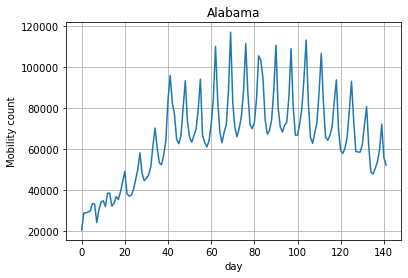

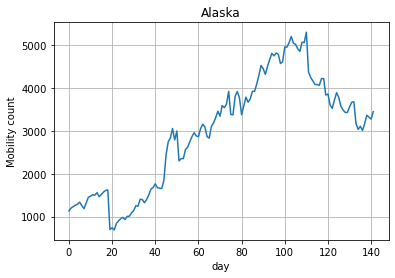

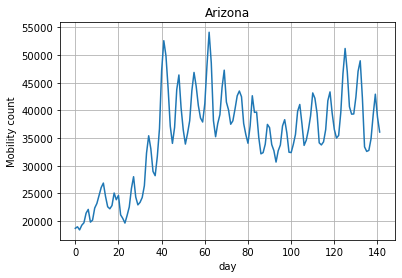

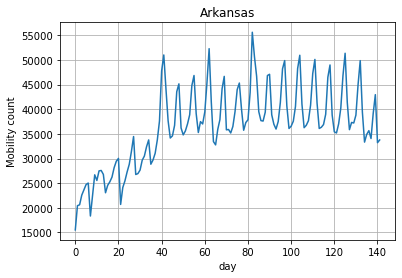

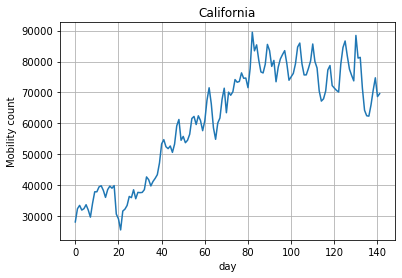

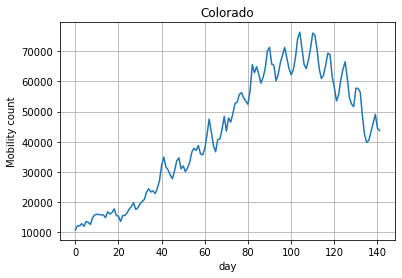

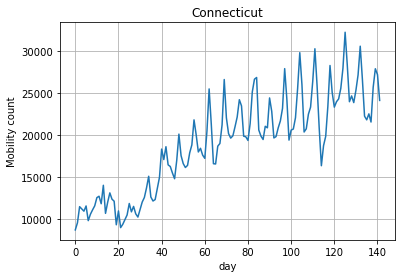

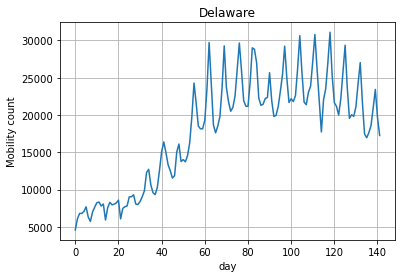

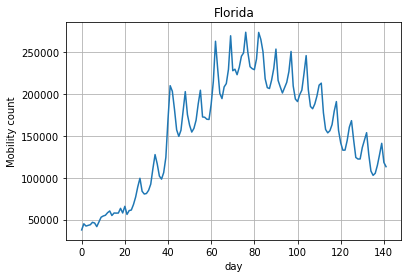

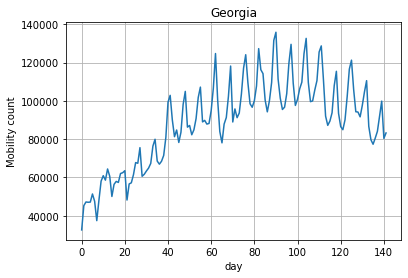

In [15]:
import matplotlib.pyplot as plt

for index in range(10):
    t = range(summarized_data.shape[1]-1)
    s = move_in_data.iloc[index,1:]

    fig, ax = plt.subplots()
    ax.plot(t, s)

    ax.set(xlabel='day', ylabel='Mobility count',
           title=move_in_data['states'][index])
    ax.grid()

    plt.show()

In [32]:
in_state_data['states'] = states
for i in range(len(states)):
    curr_df = mobility_data[(mobility_data['source_state'] == states[i]) & (mobility_data['target_state'] == states[i])].iloc[:,2:]
    move_out_data.iloc[i,1:] = curr_df.iloc[0,:]
print(in_state_data.tail())

           states  04-12-2020  04-13-2020  04-14-2020  04-15-2020  04-16-2020  \
45       Virginia    626699.0    687170.0    684302.0    685370.0    690980.0   
46     Washington    462425.0    508550.0    501313.0    511483.0    517387.0   
47  West Virginia    137638.0    151078.0    148059.0    153473.0    153370.0   
48      Wisconsin    423243.0    473760.0    457204.0    467623.0    472909.0   
49        Wyoming     34750.0     40976.0     40880.0     41813.0     39577.0   

    04-17-2020  04-18-2020  04-19-2020  04-20-2020  ...  08-22-2020  \
45    728394.0    666777.0    633008.0    674786.0  ...    854456.0   
46    536361.0    487999.0    465310.0    527009.0  ...    628611.0   
47    157741.0    145906.0    140938.0    157508.0  ...    193215.0   
48    501380.0    489012.0    451795.0    499230.0  ...    671161.0   
49     43157.0     40580.0     36705.0     42936.0  ...     51310.0   

    08-23-2020  08-24-2020  08-25-2020  08-26-2020  08-27-2020  08-28-2020  \
45    78

In [27]:
move_out_data['states'] = states
for i in range(len(states)):
    curr_df = mobility_data[(mobility_data['source_state'] == states[i]) & (mobility_data['target_state'] != states[i])].iloc[:,2:]
    move_out_data.iloc[i,1:] = curr_df.sum(axis=0)

move_out_data.tail()

,states,04-12-2020,04-13-2020,04-14-2020,04-15-2020,04-16-2020,04-17-2020,04-18-2020,04-19-2020,04-20-2020,...,08-22-2020,08-23-2020,08-24-2020,08-25-2020,08-26-2020,08-27-2020,08-28-2020,08-29-2020,08-30-2020,08-31-2020
45,Virginia,21872.0,25335.0,26495.0,26364.0,26944.0,29303.0,27717.0,24475.0,27208.0,...,87229.0,70641.0,59018.0,57170.0,58570.0,61187.0,67865.0,75183.0,66152.0,61823.0
46,Washington,15154.0,19040.0,19427.0,19703.0,20304.0,22038.0,19367.0,17352.0,20682.0,...,56857.0,49328.0,44044.0,43411.0,43830.0,45821.0,49353.0,51101.0,44761.0,43746.0
47,West Virginia,8919.0,13457.0,14375.0,14918.0,14999.0,15620.0,13305.0,11453.0,14547.0,...,30485.0,23252.0,23206.0,22915.0,23521.0,23865.0,25673.0,27677.0,23251.0,24348.0
48,Wisconsin,12617.0,18699.0,19793.0,19292.0,19762.0,19973.0,17819.0,16173.0,19326.0,...,53091.0,43180.0,40515.0,41149.0,42306.0,42819.0,44417.0,45552.0,37739.0,41063.0
49,Wyoming,2851.0,3424.0,3442.0,3575.0,3472.0,3994.0,3866.0,3312.0,3748.0,...,9852.0,7667.0,6569.0,6417.0,6646.0,6866.0,7549.0,8745.0,7257.0,7268.0


In [34]:
#write into csv
move_in_data.to_csv("move_in_data.csv")
in_state_data.to_csv("in_state_data.csv")
move_out_data.to_csv("move_out_data.csv")